<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 14: Multimodal Learning & Foundation Models**

In this session, we will cover:
1. Introduction to Multimodal Learning
2. Foundation Models
3. CLIP (Contrastive Language–Image Pretraining)
4. DALL·E (Text-to-Image Generation)
5. Multimodal Transformers
6. Cross-Modal Representations
7. Discussion & Reflections


# 1. Introduction to Multimodal Learning

**What is Multimodal Learning?**
Multimodal learning refers to the process of designing models and algorithms that can process and integrate information from multiple types of data or modalities. Common modalities include text, images, audio, video, and structured data. Unlike unimodal learning, which focuses on a single type of data, multimodal learning seeks to develop representations and reasoning mechanisms that leverage complementary information across modalities to improve performance, robustness, and generalization.

**Motivations for Multimodal Learning:**

* **Richer Representations:** Different modalities often carry complementary information. Combining them allows models to capture richer semantics. For instance, an image and its caption together provide more context than either alone.
* **Enhanced Robustness:** Multimodal systems can rely on one modality when another is noisy or missing, improving reliability.
* **Improved Generalization:** Leveraging multiple modalities can lead to better generalization in downstream tasks, particularly in zero-shot or few-shot scenarios, where models must perform tasks with either no prior examples (zero-shot) or only a very limited number of examples (few-shot) during training.
* **Human-like Understanding:** Humans naturally integrate information from various senses. Emulating this in machines brings us closer to natural human-computer interaction.

**Key Challenges in Multimodal Learning:**

* **Modality Alignment:** Ensuring that inputs from different modalities correspond meaningfully to each other (e.g., matching text descriptions to image regions).
* **Fusion:** Deciding how and when to combine multimodal data (early, late, or hybrid fusion strategies).
* **Representation Learning:** Developing joint or coordinated representations that capture cross-modal semantics effectively—that is, understanding and integrating information that spans different types of data, such as text, images, and audio.
* **Missing or Incomplete Modalities:** Handling scenarios where one or more modalities are absent or corrupted during training or inference.

**Examples of Multimodal Data:**

* **Image-Text Pairs:** Used in image captioning, visual question answering, and retrieval tasks (e.g., CLIP, DALL·E).
* **Video-Audio:** Applied in action recognition, lip reading, and audiovisual speech enhancement.
* **Vision-Language:** Central to tasks like referring expression grounding, text-to-image generation, and language-guided robotics.
* **Sensor Fusion:** Combining LIDAR, radar, and camera data in autonomous vehicles.

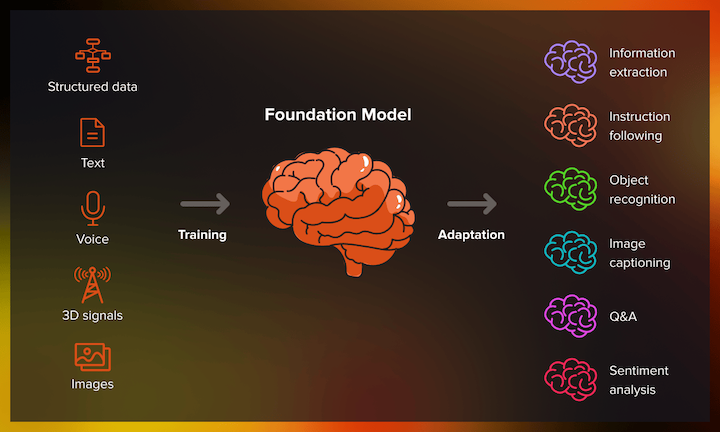

Ref: https://serokell.io/blog/guide-to-foundation-models

# 2. Foundation Models

**Definition and Characteristics:**
Foundation models are large-scale machine learning models trained on broad, diverse datasets using self-supervised or unsupervised objectives, and designed to be adaptable to a wide range of downstream tasks. They are typically built on architectures like transformers and trained on extensive computational resources.

Key characteristics include:

* **Scale:** Foundation models have billions (or even trillions) of parameters, enabling them to model complex patterns across varied data types.
* **Pretraining:** These models undergo pretraining on massive unlabeled datasets, allowing them to learn general-purpose representations before being fine-tuned for specific tasks.
* **Task Generalization:** Once pretrained, foundation models can be fine-tuned or prompted to perform well on a variety of tasks, often with minimal additional data (few-shot or zero-shot learning).

**Emergence of General-Purpose Capabilities:**
An important phenomenon observed in foundation models is the spontaneous emergence of capabilities not explicitly trained for. These include:

* **In-context learning:** The ability to solve new tasks given only examples in the input without parameter updates.
* **Transferability:** Proficiency in a wide range of downstream tasks, including those involving text, vision, and even code.
* **Multi-task performance:** A single model can outperform task-specific models in many cases, especially in zero-shot settings.

This emergence is often attributed to the sheer scale of the models and the diversity of the training data.

**Benefits of "One-Model-Fits-All" Approaches:**

One-Model-Fits-All refers to a single model architecture designed to handle a wide range of tasks or input modalities (e.g., text, images, audio) without needing separate models for each, promoting versatility and efficiency.

* **Efficiency:** Unified architectures reduce the need for maintaining many separate models.
* **Robustness:** Diverse pretraining enhances generalization and robustness to distribution shifts.
* **Rapid Adaptation:** Models can quickly adapt to new tasks or domains with minimal additional training.

**Risks and Challenges:**

* **Bias and Fairness:** Foundation models often inherit and amplify biases from their training data.
* **Opacity:** The complexity and scale make these models difficult to interpret and debug.
* **Environmental Cost:** Training large models consumes significant computational and energy resources.
* **Centralization of Power:** The development and control of these models are often limited to large organizations with access to extensive resources, raising concerns about equity and democratization of AI.

"One-Model-Fits-All" is conceptually aligned with foundation models, but they're not exactly the same:

- Foundation models are large-scale models trained on broad, diverse data (often multimodal) and designed to be adaptable to many downstream tasks—often through fine-tuning or prompting. Examples include GPT, CLIP, or PaLM.

- "One-Model-Fits-All" is more of a design philosophy or goal—aiming for a single unified model that can handle many tasks or modalities directly, often without needing significant task-specific tuning.

In practice, many foundation models are built with the One-Model-Fits-All principle in mind, so the terms are often used interchangeably in casual discussion, but technically, foundation models may still require adaptation per task.


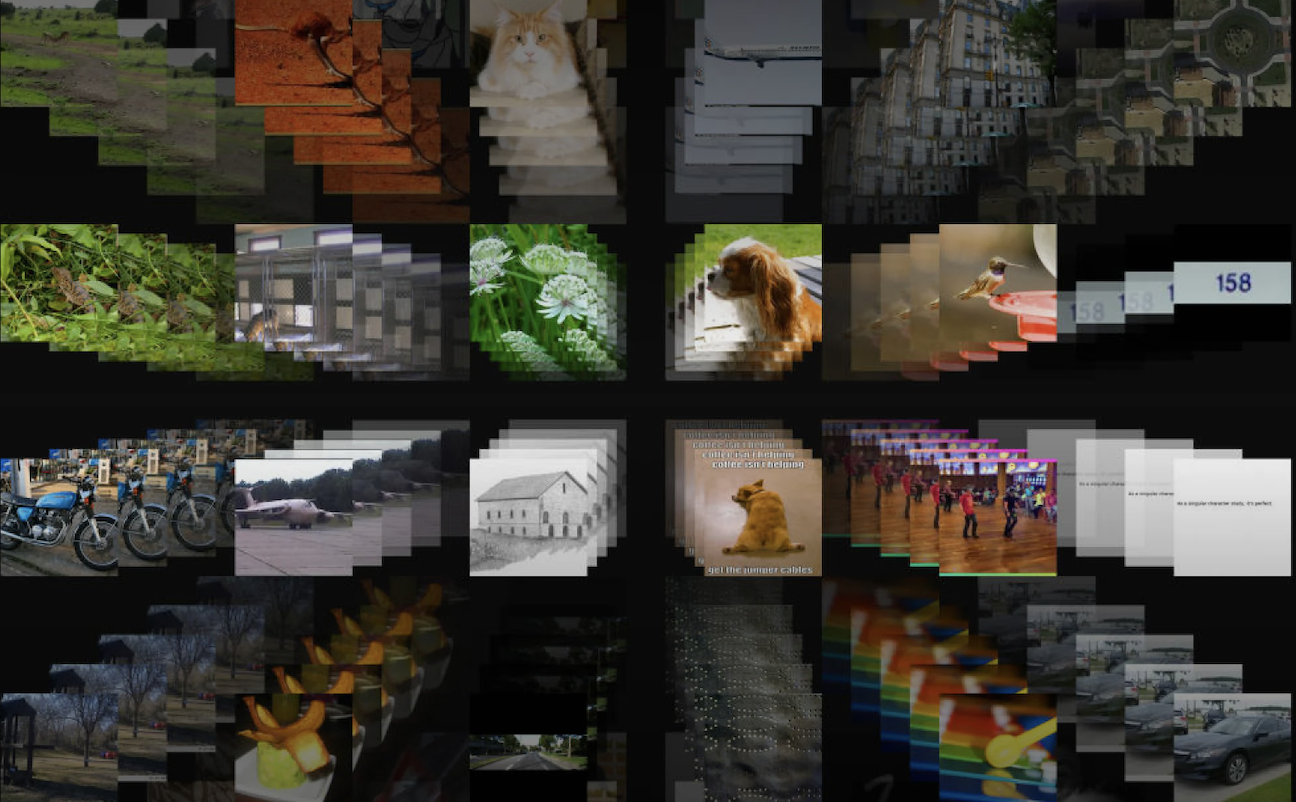

Ref: https://openai.com/index/clip/

# 3. CLIP (Contrastive Language–Image Pretraining)

**Architecture Overview:**
CLIP, developed by OpenAI, is a foundation model trained to connect images and text by learning joint representations. It uses a dual-encoder architecture, comprising:

* **Image Encoder:** Typically a Vision Transformer (ViT) or ResNet that encodes images into a dense embedding.
* **Text Encoder:** A Transformer-based model (similar to GPT or BERT) that encodes text descriptions into a matching dense embedding.

The key idea is to project both images and their corresponding textual descriptions into the same embedding space, enabling direct comparison between modalities.

**Training Objective:**
CLIP is trained using a contrastive loss on a large dataset of image-text pairs, encouraging the model to align matching images and texts while distinguishing non-matching pairs:

* Each batch contains a set of matched image-text pairs.
* The model maximizes the similarity of the correct image-text pair while minimizing the similarity of incorrect pairs within the batch.
* The result is a joint embedding space where semantically similar images and texts are close together.

This approach enables generalization across a wide variety of downstream tasks without task-specific fine-tuning.

**Zero-Shot Classification Using Natural Language:**
One of CLIP’s most powerful features is its ability to perform zero-shot classification:

* Instead of traditional class labels, CLIP uses natural language prompts like "a photo of a cat" or "a photo of a car."
* Given a set of class prompts, the model compares the similarity between an image's embedding and each text prompt’s embedding.
* The image is classified based on the most similar text prompt.

This enables CLIP to generalize to previously unseen tasks and datasets with impressive performance.

**Implications for Image Retrieval and Robustness**

* Image Retrieval: CLIP’s joint embedding space—a shared mathematical representation where both images and text are mapped—allows cross-modal retrieval, meaning the model can match information across different data types (e.g., using text to find images). For example, a text query like "a dog playing in the snow" is converted into this shared space and used to retrieve visually relevant images, even without explicit training for retrieval tasks.

* Robustness: CLIP shows strong performance under distribution shift (when the test data differs from the training data) and adversarial conditions (intentional inputs designed to confuse or mislead the model). However, it can still be sensitive to how prompts are phrased (prompt sensitivity) or fall prey to spurious correlations—patterns it learned during training that may not generalize well or reflect causation.

* Ethical Considerations: Like other foundation models, CLIP inherits biases from its training data, which may appear in its outputs and influence what it retrieves or how it interprets prompts.


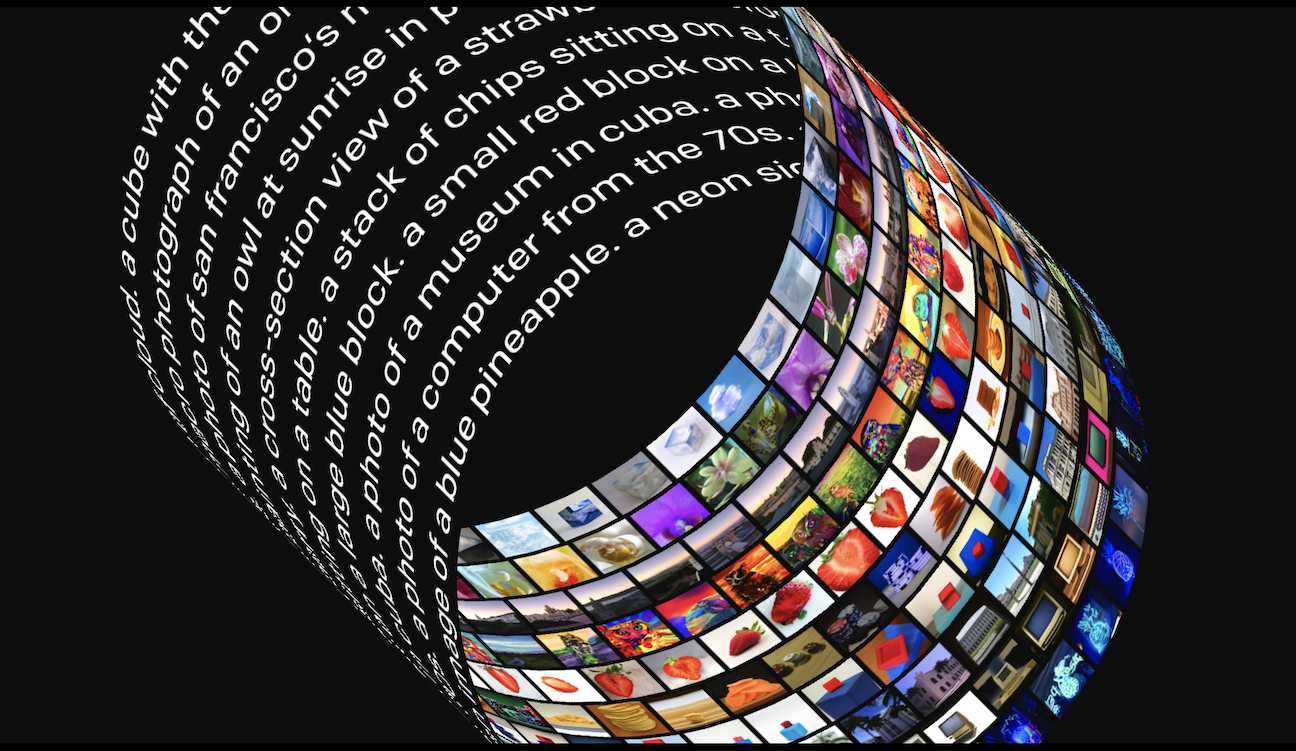

Ref: https://openai.com/index/dall-e/

# 4. DALL·E (Text-to-Image Generation)

**Overview of DALL·E and Its Evolution:**
DALL·E is a generative model developed by OpenAI that can create high-quality images from natural language prompts. It represents a significant milestone in the field of text-to-image generation. The original DALL·E was based on a transformer architecture, trained to generate images from text descriptions using discrete image tokens.

**DALL·E 2**, the next iteration, introduced notable improvements:

* Shift from discrete token-based generation to latent diffusion models.
* Improved realism, resolution, and coherence in generated images.
* Incorporation of CLIP-like text encoders for better semantic alignment.

**Text-to-Image Diffusion/Generative Modeling Pipeline:**
DALL·E 2 and similar models use a diffusion-based generation pipeline:

1. **Text Encoding:** The input prompt is encoded into a dense vector using a language model.
2. **Prior Model:** Maps the text embedding to a latent space of image representations.
3. **Decoder (Diffusion Model):** Iteratively refines random noise into an image that matches the semantic content of the prompt.

This pipeline allows fine control over the image synthesis process and leads to more photorealistic and semantically faithful outputs.

**Use Cases and Societal Implications:**

* **Creative Industries:** Graphic design, concept art, advertising, and fashion.
* **Accessibility:** Helping visually impaired users understand textual content through images.
* **Education and Science Communication:** Generating visual aids for complex concepts.
* **Risks:** Potential for misuse in deepfakes, disinformation, and generation of harmful or biased content. Ethical safeguards and watermarking are areas of active development.

To explore cross-modal representations in action, you can try this [Stable Diffusion Colab notebook from Hugging Face](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb). It showcases how text prompts are converted into images using a combination of CLIP (for interpreting the semantic meaning of the text) and Stable Diffusion (for generating corresponding visuals). Simply run the notebook, enter a descriptive text prompt—such as “a panda riding a skateboard in Times Square”—and observe how the model generates an image that reflects the prompt’s meaning, illustrating how text and image data are aligned through shared representations.

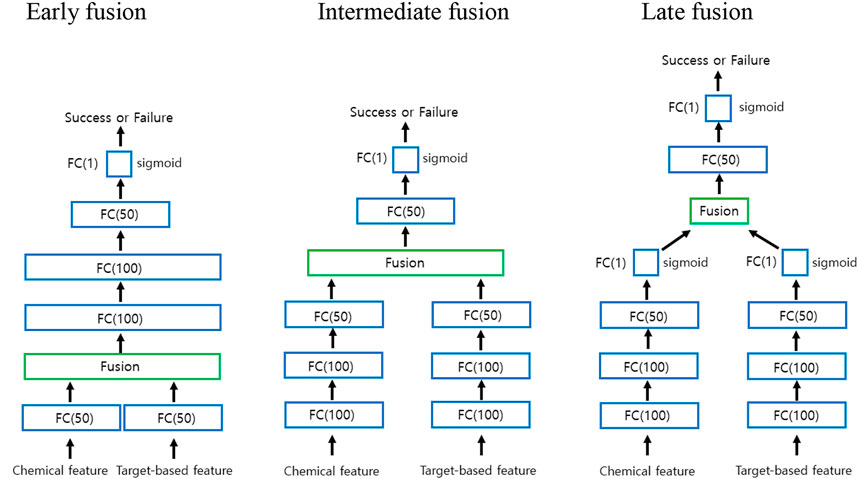

Ref: https://www.frontiersin.org/journals/pharmacology/articles/10.3389/fphar.2021.670670/full

# 5. Multimodal Transformers

**Unified Transformer Architectures for Handling Multiple Modalities:**
Multimodal transformers extend the transformer architecture to process and integrate information from multiple input types—such as text, images, and audio—within a unified model framework. Instead of treating each modality in isolation, these models aim to learn shared or coordinated representations that facilitate cross-modal reasoning.

Key architectural approaches include:

* **Single-stream (early fusion):** All modalities are combined and fed into a shared transformer encoder. Example: VisualBERT.
* **Dual-stream (late fusion):** Each modality is encoded separately and fused at a higher level. Example: CLIP.
* **Hybrid models:** Combine elements of early and late fusion to balance efficiency and performance.

**Examples of Multimodal Transformers:**

* **ViLT (Vision-and-Language Transformer):** A minimal architecture that processes visual inputs as patch embeddings (like ViT) and fuses them with tokenized text directly in a single transformer.
* **Flamingo (DeepMind):** A few-shot capable model that can handle image and text sequences with a multimodal decoder, showing strong performance with minimal task-specific data.
* **Gato (DeepMind):** A generalist agent that uses a unified transformer to process and generate across a variety of tasks and modalities, from Atari games to image captioning.

**Tokenization and Embedding Strategies for Non-Text Modalities:**

* **Image Tokenization:**

  * Vision Transformers (ViT) divide images into patches and embed them similarly to word tokens.
  * CNN features can also be projected into embedding spaces compatible with transformers.
* **Audio Tokenization:**

  * Often involves converting audio waveforms into spectrograms or learned audio tokens (e.g., with wav2vec-style encoders).
* **Video Tokenization:**

  * Frames are treated as sequences of image patches, with temporal embeddings added to capture time-based structure.

Embedding strategies often incorporate positional embeddings, which help the model understand the order or structure within a sequence (e.g., word positions in text or frame order in video), and modality-specific embeddings, which indicate the type of input (e.g., text, image, or audio) so the model can process each modality appropriately.

This code below demonstrates how three state-of-the-art vision-language models—ViLT, CLIP, and BLIP—can interpret and reason over an image using different tasks. It loads a photo of a lion and applies: (1) ViLT to answer a visual question ("What animal is in the picture?"), (2) CLIP to compute how well the image matches a set of candidate labels, and (3) BLIP to automatically generate a caption. The results are then printed and visualized: ViLT’s answer is checked for correctness, CLIP’s label probabilities are plotted, and BLIP’s caption is displayed—all highlighting different ways models perform cross-modal understanding between images and text.

[ViLT Answer]: bear (0.26s)
[CLIP Probabilities]: {'a photo of a lion': 0.9907097816467285, 'a photo of a tiger': 0.009231426753103733, 'a photo of a dog': 5.8867350162472576e-05} (0.14s)
[BLIP Caption]: a large lion laying in the grass (1.51s)


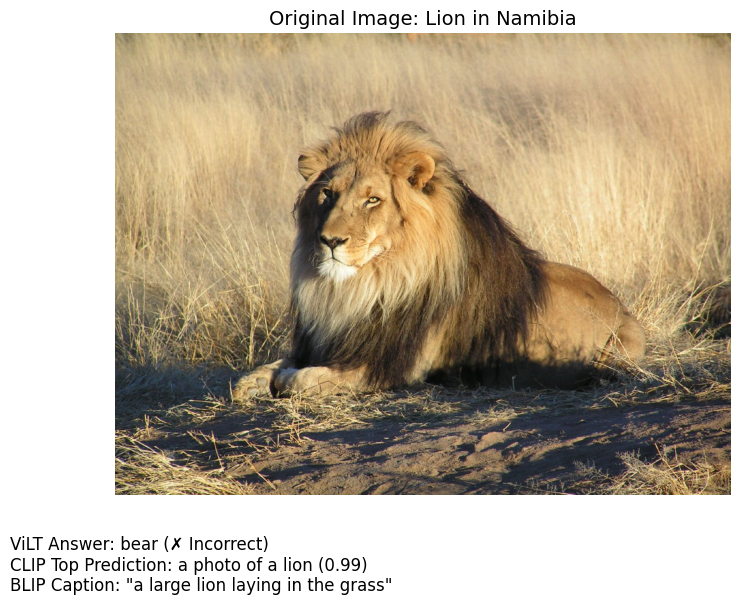

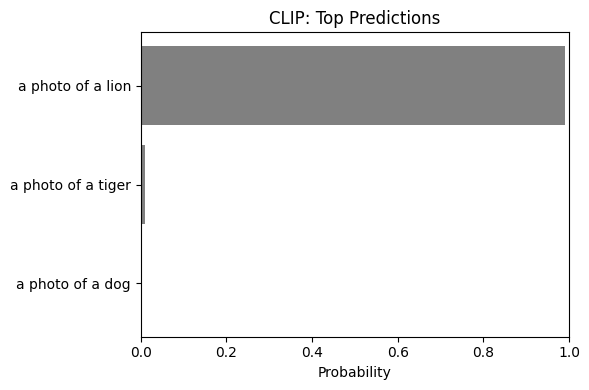

In [2]:
# Import necessary libraries
import torch
from transformers import (
    ViltProcessor, ViltForQuestionAnswering,
    CLIPProcessor, CLIPModel,
    BlipProcessor, BlipForConditionalGeneration
)
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import time

# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and prepare the image
img_url = "https://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(img_url, headers=headers)
image = Image.open(BytesIO(response.content)).convert("RGB")

# -----------------------------
# Load models and processors
# -----------------------------
vilt_processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
vilt_model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa").to(device)

clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

# -----------------------------
# Define model execution functions
# -----------------------------
def run_vilt(image, question):
    inputs = vilt_processor(image, question, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = vilt_model(**inputs)
        logits = outputs.logits
        answer = vilt_model.config.id2label[logits.argmax().item()]
    return answer

def run_clip(image, labels):
    inputs = clip_processor(text=labels, images=image, return_tensors="pt", padding=True).to(device)
    with torch.no_grad():
        outputs = clip_model(**inputs)
        probs = outputs.logits_per_image.softmax(dim=1)[0].tolist()
    return probs

def run_blip(image):
    inputs = blip_processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        caption_ids = blip_model.generate(**inputs)
        caption = blip_processor.decode(caption_ids[0], skip_special_tokens=True)
    return caption

# -----------------------------
# Run models and capture results
# -----------------------------
question = "What animal is in the picture?"
labels = ["a photo of a lion", "a photo of a tiger", "a photo of a dog"]

start = time.time()
vilt_answer = run_vilt(image, question)
print(f"[ViLT Answer]: {vilt_answer} ({time.time() - start:.2f}s)")

start = time.time()
clip_probs = run_clip(image, labels)
print(f"[CLIP Probabilities]: {dict(zip(labels, clip_probs))} ({time.time() - start:.2f}s)")

start = time.time()
blip_caption = run_blip(image)
print(f"[BLIP Caption]: {blip_caption} ({time.time() - start:.2f}s)")

# -----------------------------
# Prepare model output summary
# -----------------------------
# Evaluate ViLT correctness
correct = vilt_answer.lower() == "lion"
vilt_status = "✓ Correct" if correct else "✗ Incorrect"

# Extract top CLIP label and score
top_idx = np.argmax(clip_probs)
top_clip_label = labels[top_idx]
top_clip_prob = clip_probs[top_idx]

# -----------------------------
# Visualization of results
# -----------------------------
# Show original image and model predictions
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')
plt.title("Original Image: Lion in Namibia", fontsize=14)

# Composite text block summarizing outputs
text_output = (
    f"ViLT Answer: {vilt_answer} ({vilt_status})\n"
    f"CLIP Top Prediction: {top_clip_label} ({top_clip_prob:.2f})\n"
    f"BLIP Caption: \"{blip_caption}\""
)
plt.figtext(0.1, -0.05, text_output, fontsize=12, ha="left")

# Show CLIP bar chart with sorted probabilities
plt.figure(figsize=(6, 4))
sorted_idx = np.argsort(clip_probs)[::-1]
top_labels = [labels[i] for i in sorted_idx]
top_probs = [clip_probs[i] for i in sorted_idx]

plt.barh(top_labels[::-1], top_probs[::-1], color='gray')
plt.xlim(0, 1)
plt.xlabel("Probability")
plt.title("CLIP: Top Predictions")
plt.tight_layout()
plt.show()

### The fusion strategies map to the models used in the code:

**1. ViLT – Early Fusion** ViLT fuses visual patch embeddings and text token embeddings early in a single transformer encoder. Both modalities are processed jointly from the start. Architecture: Single-stream transformer.

**2. CLIP – Late Fusion** CLIP uses two separate encoders—one for text and one for images. Their embeddings are only compared at the end (via dot product for similarity). Architecture: Dual-stream transformer.

**3. BLIP – Hybrid Fusion** BLIP uses a two-stage approach:

- An image encoder (usually ViT or CNN) creates visual embeddings.
- A text decoder (transformer-based) generates or reasons about text conditioned on image features.

This combines both separate and integrated modality processing.

**Terminology:**

- Early Fusion = Feature-level fusion at the input stage (e.g. stacking modalities as channels)

- Hybrid Fusion = Also called Intermediate Fusion = Fusion at intermediate feature levels (e.g. after a few CNN layers)

- Late Fusion = Fusion at the decision/output level (e.g. averaging predictions)

In [3]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.5 MB/s eta 0:00:00


This project uses the Multi-Modality Brain Tumor MRI & PET DICOM Series dataset, available on Kaggle (https://www.kaggle.com/datasets/grantmcnatt/mri-and-pet-dice-similarity-dataset). The dataset provides paired axial DICOM scans, including both MRI and PET images that are co-registered for direct comparison in brain tumor cases.

For the purpose of this project, I created separate folders labeled as “tumor” and “benign” to simulate a binary classification task. These labels are not part of the original dataset and were assigned only to demonstrate the implementation of early, late, and hybrid fusion strategies in a multimodal deep learning pipeline. The data remains unprocessed, making it a suitable educational tool for exploring preprocessing techniques, fusion models, and classification workflows in medical imaging.

This code implements an **early fusion deep learning model** for classifying brain scans using multi-modal medical imaging data—MRI and PET—from DICOM files. After mounting Google Drive and extracting the dataset, it loads and preprocesses the images (normalizing and resizing them), then stacks MRI and PET slices together channel-wise for early fusion. The model uses a custom EarlyFusionCNN convolutional neural network to learn joint features from both modalities. The data is split into training and testing sets, and the model is trained to classify each sample as benign or tumor. After training, a visualization section displays MRI and PET slices alongside the model’s prediction and the true label, demonstrating how the early fusion model performs multi-modal classification.

Mounted at /content/gdrive
Data unzipped to: /content/brain_multimodal
Epoch [1/5], Train Loss: 0.3721, Train Acc: 78.95%, Test Acc: 100.00%
Epoch [2/5], Train Loss: 0.0359, Train Acc: 100.00%, Test Acc: 100.00%
Epoch [3/5], Train Loss: 0.0000, Train Acc: 100.00%, Test Acc: 100.00%
Epoch [4/5], Train Loss: 0.0000, Train Acc: 100.00%, Test Acc: 100.00%
Epoch [5/5], Train Loss: 0.0000, Train Acc: 100.00%, Test Acc: 100.00%


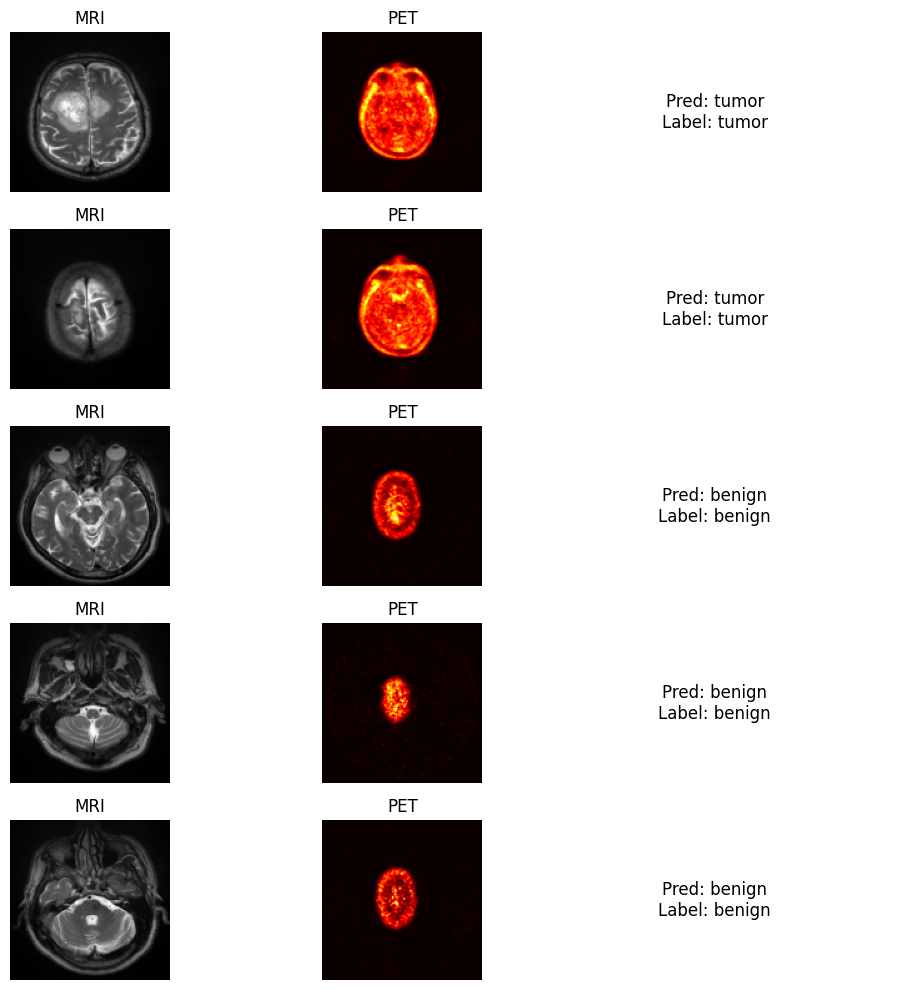

In [4]:
# Early Fusion Model with Visualization
# Mount Google Drive and unzip dataset
from google.colab import drive
import zipfile
import os
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from skimage.transform import resize

# Mount Google Drive
drive.mount('/content/gdrive')

# Define paths
zip_path = "/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/Brain_MultiModal.zip"
unzip_dir = "/content/brain_multimodal"

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Data unzipped to:", unzip_dir)

# Load DICOM series and sort by InstanceNumber
def load_dicom_series(folder_path):
    slices = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".dcm"):
            path = os.path.join(folder_path, filename)
            ds = pydicom.dcmread(path)
            slices.append(ds)
    slices.sort(key=lambda x: int(x.InstanceNumber))
    return [s.pixel_array for s in slices]

# Preprocess: normalize and resize to (128, 128)
def preprocess(volume):
    norm_slices = []
    for img in volume:
        img = img.astype(np.float32)
        img = (img - np.mean(img)) / (np.std(img) + 1e-8)
        img = resize(img, (128, 128), preserve_range=True)
        norm_slices.append(img)
    return np.stack(norm_slices)

# Load and preprocess MRI and PET for each class
def load_and_preprocess(mri_path, pet_path):
    mri = preprocess(load_dicom_series(mri_path))
    pet = preprocess(load_dicom_series(pet_path))
    min_slices = min(len(mri), len(pet))
    return mri[:min_slices], pet[:min_slices]

# Paths to class folders
base_dir = os.path.join(unzip_dir, "Brain_MultiModal")
tumor_mri_path = os.path.join(base_dir, "TumorMRI")
tumor_pet_path = os.path.join(base_dir, "TumorPET")
benign_mri_path = os.path.join(base_dir, "BenignMRI")
benign_pet_path = os.path.join(base_dir, "BenignPET")

# Load data
tumor_mri, tumor_pet = load_and_preprocess(tumor_mri_path, tumor_pet_path)
benign_mri, benign_pet = load_and_preprocess(benign_mri_path, benign_pet_path)

# Label map
label_map = {0: "benign", 1: "tumor"}

# Combine data
all_data = []
all_labels = []

for i in range(len(tumor_mri)):
    combined = np.stack([tumor_mri[i], tumor_pet[i]], axis=0)
    all_data.append(combined)
    all_labels.append(1)

for i in range(len(benign_mri)):
    combined = np.stack([benign_mri[i], benign_pet[i]], axis=0)
    all_data.append(combined)
    all_labels.append(0)

# Train/Test split
train_data, test_data, train_labels, test_labels = train_test_split(
    all_data, all_labels, test_size=0.2, stratify=all_labels, random_state=42
)

# Dataset
class BrainMultiModalDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx], dtype=torch.float32)
        y = torch.tensor(self.labels[idx], dtype=torch.long)
        return x, y

# DataLoaders
train_dataset = BrainMultiModalDataset(train_data, train_labels)
test_dataset = BrainMultiModalDataset(test_data, test_labels)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# CNN model
class EarlyFusionCNN(nn.Module):
    def __init__(self):
        super(EarlyFusionCNN, self).__init__()
        self.conv1 = nn.Conv2d(2, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training setup
model = EarlyFusionCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop with test evaluation
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = 100 * correct / total

    # Evaluate on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_acc = 100 * correct_test / total_test
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

# --------- Visualization Section ---------
model.eval()
num_examples = min(6, len(test_dataset))

fig, axes = plt.subplots(num_examples, 3, figsize=(10, 2 * num_examples))
with torch.no_grad():
    for i in range(num_examples):
        image, label = test_dataset[i]
        input_tensor = image.unsqueeze(0).to(device)
        output = model(input_tensor)
        prediction = torch.argmax(output, dim=1).item()

        axes[i, 0].imshow(image[0], cmap='gray')
        axes[i, 0].set_title("MRI")
        axes[i, 1].imshow(image[1], cmap='hot')
        axes[i, 1].set_title("PET")
        axes[i, 2].axis('off')
        axes[i, 2].text(
            0.5, 0.5,
            f"Pred: {label_map[prediction]}\nLabel: {label_map[label.item()]}",
            fontsize=12, ha='center', va='center', transform=axes[i,2].transAxes
        )

for ax in axes.ravel():
    ax.axis('off')
plt.tight_layout()
plt.show()


This code implements a **late fusion deep learning model** that classifies brain scan data by processing MRI and PET images separately through two parallel convolutional branches, and then combining their learned features at a later stage for joint decision-making. The code begins by mounting Google Drive, unzipping a multi-modal dataset of DICOM images, and preprocessing them (normalizing and resizing). It constructs a PyTorch dataset that keeps MRI and PET data separate, labels them as either tumor or benign, and splits them into training and test sets. The LateFusionCNN model extracts features independently from each modality and concatenates them before passing through fully connected layers for classification. The training loop optimizes the model using cross-entropy loss, and evaluation metrics are printed for both training and test accuracy. Finally, a visualization section displays selected MRI and PET images alongside the model’s predictions and ground-truth labels, illustrating how the late fusion approach leverages complementary information from both imaging modalities to improve diagnostic performance.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Data unzipped to: /content/brain_multimodal
Epoch [1/5] Train Loss: 1.1163, Train Acc: 63.16%, Test Acc: 100.00%
Epoch [2/5] Train Loss: 0.0712, Train Acc: 94.74%, Test Acc: 100.00%
Epoch [3/5] Train Loss: 0.0100, Train Acc: 100.00%, Test Acc: 100.00%
Epoch [4/5] Train Loss: 0.0003, Train Acc: 100.00%, Test Acc: 100.00%
Epoch [5/5] Train Loss: 0.0000, Train Acc: 100.00%, Test Acc: 100.00%


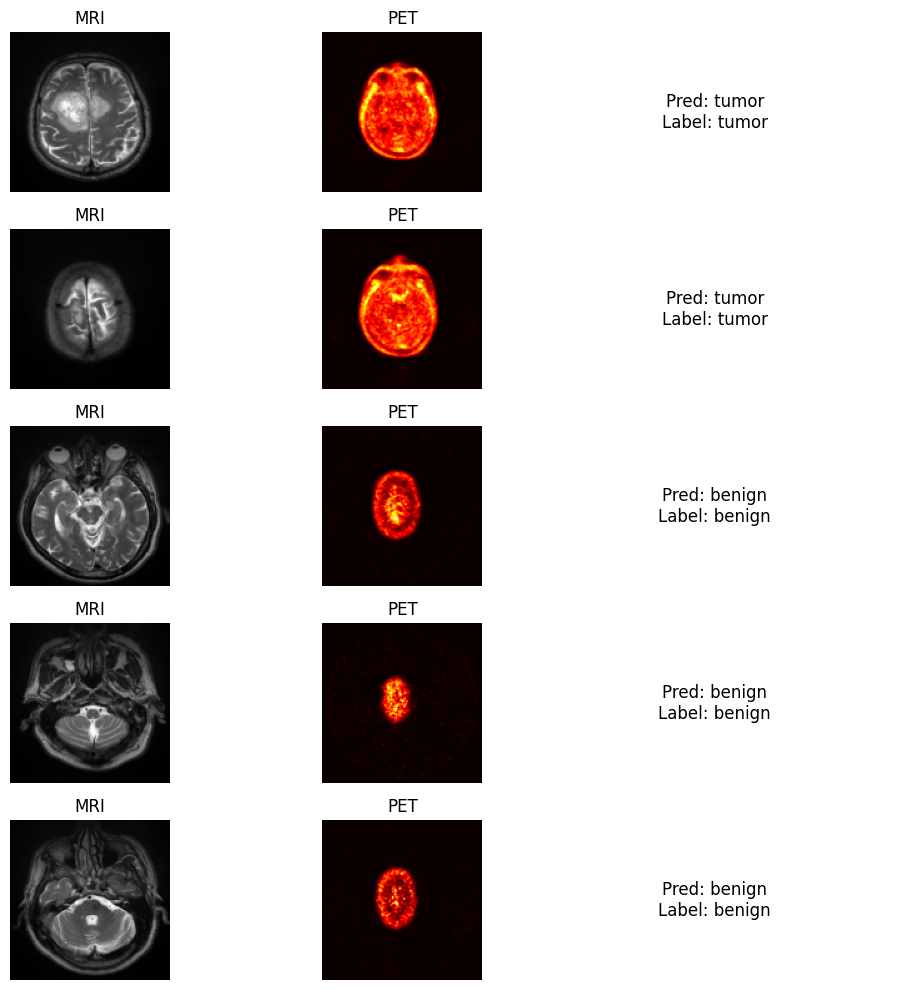

In [5]:
# Late Fusion Model with Visualization
# Mount Google Drive and unzip dataset
from google.colab import drive
import zipfile
import os
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from skimage.transform import resize

# Mount Google Drive
drive.mount('/content/gdrive')

# Define paths
zip_path = "/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/Brain_MultiModal.zip"
unzip_dir = "/content/brain_multimodal"

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Data unzipped to:", unzip_dir)

# Load DICOM series and sort by InstanceNumber
def load_dicom_series(folder_path):
    slices = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".dcm"):
            path = os.path.join(folder_path, filename)
            ds = pydicom.dcmread(path)
            slices.append(ds)
    slices.sort(key=lambda x: int(x.InstanceNumber))
    return [s.pixel_array for s in slices]

# Preprocess: normalize and resize to (128, 128)
def preprocess(volume):
    norm_slices = []
    for img in volume:
        img = img.astype(np.float32)
        img = (img - np.mean(img)) / (np.std(img) + 1e-8)
        img = resize(img, (128, 128), preserve_range=True)
        norm_slices.append(img)
    return np.stack(norm_slices)

# Load and preprocess MRI and PET for each class
def load_and_preprocess(mri_path, pet_path):
    mri = preprocess(load_dicom_series(mri_path))
    pet = preprocess(load_dicom_series(pet_path))
    min_slices = min(len(mri), len(pet))
    return mri[:min_slices], pet[:min_slices]

# Paths to class folders
base_dir = os.path.join(unzip_dir, "Brain_MultiModal")
tumor_mri_path = os.path.join(base_dir, "TumorMRI")
tumor_pet_path = os.path.join(base_dir, "TumorPET")
benign_mri_path = os.path.join(base_dir, "BenignMRI")
benign_pet_path = os.path.join(base_dir, "BenignPET")

# Load data
tumor_mri, tumor_pet = load_and_preprocess(tumor_mri_path, tumor_pet_path)
benign_mri, benign_pet = load_and_preprocess(benign_mri_path, benign_pet_path)

# Label map
label_map = {0: "benign", 1: "tumor"}

# Combine data
all_mri = []
all_pet = []
all_labels = []

for i in range(len(tumor_mri)):
    all_mri.append(tumor_mri[i])
    all_pet.append(tumor_pet[i])
    all_labels.append(1)

for i in range(len(benign_mri)):
    all_mri.append(benign_mri[i])
    all_pet.append(benign_pet[i])
    all_labels.append(0)

# Train/Test split
(train_mri, test_mri,
 train_pet, test_pet,
 train_labels, test_labels) = train_test_split(
    all_mri, all_pet, all_labels, test_size=0.2, stratify=all_labels, random_state=42
)

# Dataset
class BrainMultiModalDataset(Dataset):
    def __init__(self, mri_list, pet_list, labels):
        self.mri = mri_list
        self.pet = pet_list
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        mri = torch.tensor(self.mri[idx], dtype=torch.float32).unsqueeze(0)
        pet = torch.tensor(self.pet[idx], dtype=torch.float32).unsqueeze(0)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return mri, pet, label

# DataLoaders
train_dataset = BrainMultiModalDataset(train_mri, train_pet, train_labels)
test_dataset = BrainMultiModalDataset(test_mri, test_pet, test_labels)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# CNN model (Late Fusion)
class LateFusionCNN(nn.Module):
    def __init__(self):
        super(LateFusionCNN, self).__init__()

        # Separate branches
        self.mri_branch = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.pet_branch = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Combined fully connected layers
        self.fc1 = nn.Linear(32 * 32 * 32 * 2, 64)  # Double features after concat
        self.fc2 = nn.Linear(64, 2)

    def forward(self, mri, pet):
        mri_feat = self.mri_branch(mri)
        pet_feat = self.pet_branch(pet)
        combined = torch.cat((mri_feat, pet_feat), dim=1)
        combined = combined.view(combined.size(0), -1)
        x = F.relu(self.fc1(combined))
        x = self.fc2(x)
        return x

# Training setup
model = LateFusionCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for mri, pet, labels in train_loader:
        mri, pet, labels = mri.to(device), pet.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(mri, pet)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * mri.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    train_loss = total_loss / total

    # Evaluation
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for mri, pet, labels in test_loader:
            mri, pet, labels = mri.to(device), pet.to(device), labels.to(device)
            outputs = model(mri, pet)
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    test_acc = 100 * correct_test / total_test
    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

# --------- Visualization Section ---------
model.eval()
num_examples = min(6, len(test_dataset))
fig, axes = plt.subplots(num_examples, 3, figsize=(10, 2 * num_examples))

with torch.no_grad():
    for i in range(num_examples):
        mri, pet, label = test_dataset[i]
        mri_input = mri.unsqueeze(0).to(device)
        pet_input = pet.unsqueeze(0).to(device)
        output = model(mri_input, pet_input)
        prediction = torch.argmax(output, dim=1).item()

        axes[i, 0].imshow(mri.squeeze(0), cmap='gray')
        axes[i, 0].set_title("MRI")
        axes[i, 1].imshow(pet.squeeze(0), cmap='hot')
        axes[i, 1].set_title("PET")
        axes[i, 2].axis('off')
        axes[i, 2].text(0.5, 0.5,
                        f"Pred: {label_map[prediction]}\nLabel: {label_map[label.item()]}",
                        fontsize=12, ha='center', va='center', transform=axes[i, 2].transAxes)

for ax in axes.ravel():
    ax.axis('off')
plt.tight_layout()
plt.show()


This code implements a **hybrid fusion deep learning model** that combines both early and late fusion strategies to classify brain images using MRI and PET scans. After mounting Google Drive and extracting a multi-modal dataset of DICOM files, the code preprocesses the images and prepares a PyTorch dataset that keeps MRI and PET modalities separate. The HybridFusionCNN processes each modality through independent early convolutional layers, then fuses their feature maps mid-network by concatenating them before passing the combined features through shared convolutional and fully connected layers. This approach leverages modality-specific encoding while allowing joint learning in deeper layers. The model is trained using cross-entropy loss to distinguish between benign and tumor classes, and accuracy metrics are reported for both training and test sets across epochs. Finally, the visualization section displays side-by-side MRI and PET slices with model predictions and true labels, helping illustrate how hybrid fusion leverages complementary information from both imaging sources for improved medical image classification.



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Data unzipped to: /content/brain_multimodal
Epoch [1/5] Train Loss: 0.2276, Train Acc: 89.47%, Test Acc: 100.00%
Epoch [2/5] Train Loss: 0.0000, Train Acc: 100.00%, Test Acc: 100.00%
Epoch [3/5] Train Loss: 0.0000, Train Acc: 100.00%, Test Acc: 100.00%
Epoch [4/5] Train Loss: 0.0000, Train Acc: 100.00%, Test Acc: 100.00%
Epoch [5/5] Train Loss: 0.0000, Train Acc: 100.00%, Test Acc: 100.00%


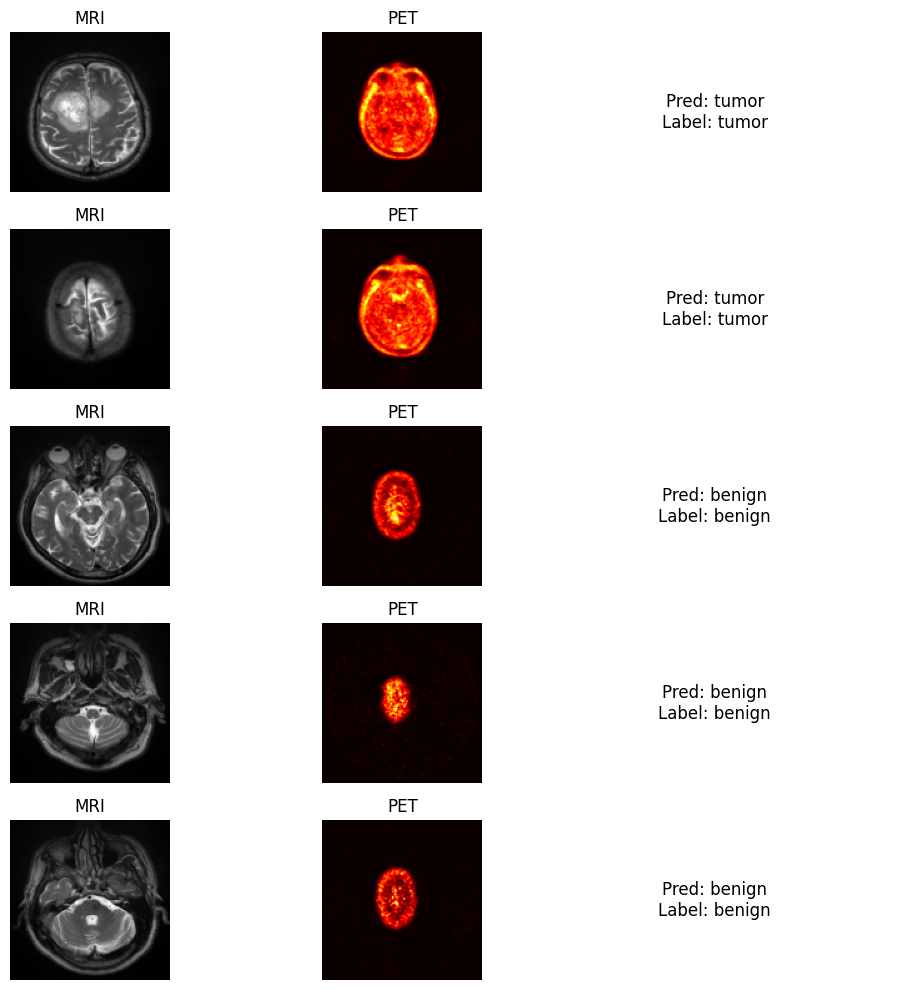

In [6]:
# Hybrid Fusion Model with Visualization
# Mount Google Drive and unzip dataset
from google.colab import drive
import zipfile
import os
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from skimage.transform import resize

# Mount Google Drive
drive.mount('/content/gdrive')

# Define paths
zip_path = "/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/Brain_MultiModal.zip"
unzip_dir = "/content/brain_multimodal"

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Data unzipped to:", unzip_dir)

# Load DICOM series and sort by InstanceNumber
def load_dicom_series(folder_path):
    slices = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".dcm"):
            path = os.path.join(folder_path, filename)
            ds = pydicom.dcmread(path)
            slices.append(ds)
    slices.sort(key=lambda x: int(x.InstanceNumber))
    return [s.pixel_array for s in slices]

# Preprocess: normalize and resize to (128, 128)
def preprocess(volume):
    norm_slices = []
    for img in volume:
        img = img.astype(np.float32)
        img = (img - np.mean(img)) / (np.std(img) + 1e-8)
        img = resize(img, (128, 128), preserve_range=True)
        norm_slices.append(img)
    return np.stack(norm_slices)

# Load and preprocess MRI and PET for each class
def load_and_preprocess(mri_path, pet_path):
    mri = preprocess(load_dicom_series(mri_path))
    pet = preprocess(load_dicom_series(pet_path))
    min_slices = min(len(mri), len(pet))
    return mri[:min_slices], pet[:min_slices]

# Paths to class folders
base_dir = os.path.join(unzip_dir, "Brain_MultiModal")
tumor_mri_path = os.path.join(base_dir, "TumorMRI")
tumor_pet_path = os.path.join(base_dir, "TumorPET")
benign_mri_path = os.path.join(base_dir, "BenignMRI")
benign_pet_path = os.path.join(base_dir, "BenignPET")

# Load data
tumor_mri, tumor_pet = load_and_preprocess(tumor_mri_path, tumor_pet_path)
benign_mri, benign_pet = load_and_preprocess(benign_mri_path, benign_pet_path)

# Label map
label_map = {0: "benign", 1: "tumor"}

# Combine data
all_mri = []
all_pet = []
all_labels = []

for i in range(len(tumor_mri)):
    all_mri.append(tumor_mri[i])
    all_pet.append(tumor_pet[i])
    all_labels.append(1)

for i in range(len(benign_mri)):
    all_mri.append(benign_mri[i])
    all_pet.append(benign_pet[i])
    all_labels.append(0)

# Train/Test split
(train_mri, test_mri,
 train_pet, test_pet,
 train_labels, test_labels) = train_test_split(
    all_mri, all_pet, all_labels, test_size=0.2, stratify=all_labels, random_state=42
)

# Dataset
class BrainMultiModalDataset(Dataset):
    def __init__(self, mri_list, pet_list, labels):
        self.mri = mri_list
        self.pet = pet_list
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        mri = torch.tensor(self.mri[idx], dtype=torch.float32).unsqueeze(0)
        pet = torch.tensor(self.pet[idx], dtype=torch.float32).unsqueeze(0)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return mri, pet, label

# DataLoaders
train_dataset = BrainMultiModalDataset(train_mri, train_pet, train_labels)
test_dataset = BrainMultiModalDataset(test_mri, test_pet, test_labels)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Hybrid Fusion CNN
class HybridFusionCNN(nn.Module):
    def __init__(self):
        super(HybridFusionCNN, self).__init__()

        # Separate early branches
        self.mri_branch = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.pet_branch = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Shared middle layers
        self.shared_conv = nn.Sequential(
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc1 = nn.Linear(32 * 32 * 32, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, mri, pet):
        mri_feat = self.mri_branch(mri)
        pet_feat = self.pet_branch(pet)
        fused = torch.cat((mri_feat, pet_feat), dim=1)
        x = self.shared_conv(fused)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training setup
model = HybridFusionCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop with test evaluation
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for mri, pet, labels in train_loader:
        mri, pet, labels = mri.to(device), pet.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(mri, pet)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * mri.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = total_loss / total
    train_acc = 100 * correct / total

    # Test evaluation
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for mri, pet, labels in test_loader:
            mri, pet, labels = mri.to(device), pet.to(device), labels.to(device)
            outputs = model(mri, pet)
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    test_acc = 100 * correct_test / total_test
    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

# --------- Visualization Section ---------
model.eval()
num_examples = min(6, len(test_dataset))

fig, axes = plt.subplots(num_examples, 3, figsize=(10, 2 * num_examples))
with torch.no_grad():
    for i in range(num_examples):
        mri, pet, label = test_dataset[i]
        mri_input = mri.unsqueeze(0).to(device)
        pet_input = pet.unsqueeze(0).to(device)
        output = model(mri_input, pet_input)
        prediction = torch.argmax(output, dim=1).item()

        axes[i, 0].imshow(mri.squeeze(0), cmap='gray')
        axes[i, 0].set_title("MRI")
        axes[i, 1].imshow(pet.squeeze(0), cmap='hot')
        axes[i, 1].set_title("PET")
        axes[i, 2].axis('off')
        axes[i, 2].text(
            0.5, 0.5,
            f"Pred: {label_map[prediction]}\nLabel: {label_map[label.item()]}",
            fontsize=12, ha='center', va='center', transform=axes[i, 2].transAxes
        )

for ax in axes.ravel():
    ax.axis('off')
plt.tight_layout()
plt.show()


### Guide to Using Multiple MRI Modalities in Multimodal Fusion

If you want to extend your current multimodal model to use three types of MRI scans—like T2-weighted, Diffusion-Weighted Imaging (DWI), and Apparent Diffusion Coefficient (ADC)—you absolutely can, using the same fusion principles already implemented for MRI + PET. The key is to organize your data and adapt your model to handle the new modalities appropriately.

Start by structuring your dataset so each modality is stored in a separate folder under a common root, for example:

```
Brain_MultiModal/
├── T2/
├── DWI/
├── ADC/
```

Each of these folders should contain aligned axial DICOM slices. That means the number of slices, their order, and anatomical orientation should be consistent across modalities. This alignment is critical for meaningful multimodal fusion.

Once the data is organized, the changes to your model depend on the fusion strategy you plan to use:

**Early Fusion:** This approach is the simplest to extend. In your dataset class, load the T2, DWI, and ADC slices corresponding to the same index and stack them as separate channels. This will give you an input tensor of shape `(3, H, W)`, which you feed into a CNN expecting 3 input channels. This method treats the different modalities as complementary color channels, which is conceptually simple and efficient.

**Hybrid Fusion:** For hybrid fusion, you build a separate CNN branch for each modality—so three branches total in this case. Each branch processes its modality independently through several convolutional layers. Then, you concatenate the resulting feature vectors and pass them through fully connected layers for classification. This allows each modality to learn specialized features before contributing to a shared representation, which is often more flexible and powerful than early fusion.

**Late Fusion:** In a late fusion setup, each modality goes through its full CNN pipeline independently, each producing its own prediction. These predictions are then combined at the decision level. You can average their softmax scores, apply weighted fusion, or even feed the individual predictions into a simple meta-classifier (e.g., logistic regression or a small neural net). This is useful when modalities provide highly distinct but complementary information.

Regardless of the fusion strategy, remember to normalize each modality independently, since their intensity distributions differ. For example, T2 images have different dynamic ranges compared to DWI or ADC, and using a consistent preprocessing routine (like z-score normalization) helps models learn effectively.

By adapting your dataset loader and model structure this way, you can seamlessly scale up to three or more modalities and use your existing codebase as a foundation. This extension also makes for an excellent teaching example, illustrating how fusion depth and strategy affect model performance.


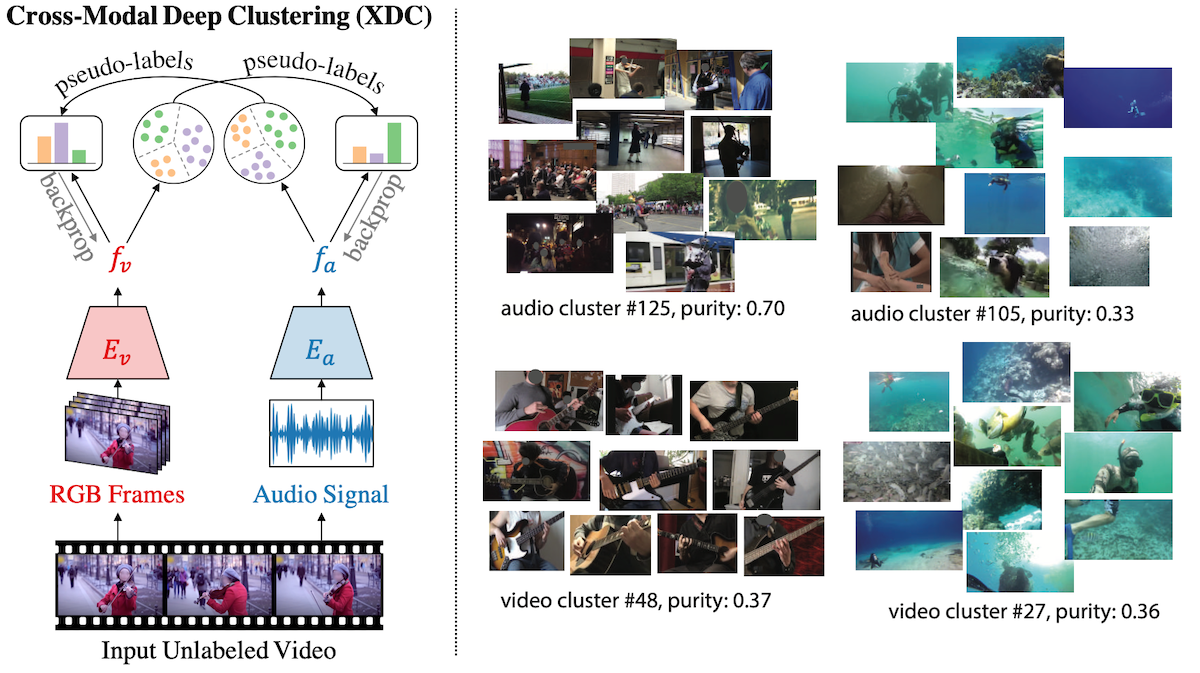

Ref: https://www.humamalwassel.com/publication/xdc/

# 6. Cross-Modal Representations

**What Are Cross-Modal Representations and Why Are They Important?**
Cross-modal representations refer to learned feature spaces where data from different modalities—such as images, text, audio, or video—can be meaningfully compared, combined, or reasoned over. These representations allow a model to understand and operate across diverse data types, enabling powerful capabilities in tasks that require semantic alignment between modalities.

Their importance stems from:

* **Semantic Bridging:** Capturing shared meanings across modalities enables the model to interpret, retrieve, or generate content in a modality it wasn't explicitly trained on.
* **Unified Learning:** Facilitates transfer learning and zero-shot performance across diverse tasks by providing a common understanding across input types.
* **Enhanced Interactivity:** Supports multimodal interfaces (e.g., querying images with text, generating captions from video, or aligning audio with visual context).


**Joint Embedding Spaces vs. Aligned Embeddings:**

* **Joint Embedding Spaces:**

  * Modalities are projected into a shared feature space where distances reflect semantic similarity.
  * Enables direct comparison (e.g., a sentence and an image or sound clip can be matched based on meaning).
  * **Examples:** CLIP (image-text), ALIGN (image-text), and XDC (audio-video), where embeddings from audio and video are learned together to enable mutual understanding.

* **Aligned Embeddings:**

  * Each modality maintains a separate space but mappings are learned between them.
  * Supports task-specific reasoning and flexibility while enabling cross-modal alignment.
  * **Examples:** Many early vision-language models and multimodal transformers.


**Applications:**

* **Visual Question Answering (VQA):** Answering questions about an image by combining natural language understanding and image interpretation.
* **Cross-Modal Retrieval:** Searching for images using text, or finding video clips using audio cues (e.g., find scenes with “laughter” or “explosions”).
* **Image/Video Captioning:** Generating natural language descriptions of visual (and possibly auditory) content.
* **Referring Expression Comprehension:** Identifying objects in an image or video from descriptive language.
* **Audio-Video Representation Learning:** For example, XDC (Cross-Modal Deep Clustering) trains a model to use unsupervised clustering in one modality (e.g., audio) to supervise another (e.g., video), learning robust semantic features across both. This approach outperforms single-modality methods and even some fully supervised models on action recognition tasks—highlighting the value of cross-modal learning beyond traditional image-text pairs.


**Why It Matters:**
Cross-modal representations are foundational to multimodal AI systems, enabling machines to perceive, understand, and reason across complex real-world signals. Whether pairing sound with vision, language with perception, or all three together, these techniques are driving advances in fields from robotics and medicine to entertainment and accessibility.

# 7. Discussion & Reflections

**Where Is Multimodal ML Headed?**

The field of multimodal machine learning is advancing rapidly, with growing focus on generalization, adaptability, and scalability. Emerging trends include:

* **Unified Multimodal Models:** Architectures that natively handle text, vision, audio, and other modalities in a seamless way.
* **Interactive and Embodied AI:** Integration into robotics, virtual assistants, and AR/VR environments for real-time, context-aware interaction.
* **Multilingual and Multimodal Fusion:** Systems capable of understanding and generating content across both languages and modalities.
* **Resource Efficiency:** Techniques such as sparse modeling and mixture-of-experts to optimize compute usage while retaining performance.


**Foundation Models as Infrastructure: Societal, Ethical, and Technical Considerations**

Foundation models are increasingly seen as infrastructure rather than standalone tools, supporting a wide range of downstream applications. This reframing raises several important concerns:

* **Societal Impact:** How these models influence education, labor, creativity, and access to emerging technologies.
* **Ethical Risks:** Challenges related to misinformation, cultural homogenization, and fairness.
* **Technical Responsibility:** Questions around control, transparency, and accountability in training and deployment practices.


**A Critical Look at Overgeneralization and Potential Biases**

* **Overgeneralization:** These models may overapply patterns learned in one domain to others, leading to inappropriate or misleading outputs.
* **Spurious Correlations:** Training on massive datasets can amplify irrelevant or biased patterns, complicating interpretability and reliability.
* **Biases:** Foundation models often encode and reinforce social biases—such as those based on race, gender, or culture—which are not just technical problems but deeply human and systemic.


Multimodal machine learning holds great promise, but realizing its full potential responsibly will require careful attention to these emerging challenges.
